# GROMACS large benchmark performance

## Setup section

Import the required modules and define basic functions for reading the data from GROMACS output files and analysing it.

In [68]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")

In [69]:
import sys
sys.path.append('../../../python-modules')

In [70]:
from appanalysis import gromacs

## Setup results files

In [71]:
archercpn = 24
archerfiles = {2:'../large/results/ARCHER/nc2-cubic-md_2nodes_201806071419.log',
               4:'../large/results/ARCHER/nc2-cubic-md_4nodes_201711212001.log',
               8:'../large/results/ARCHER/nc2-cubic-md_8nodes_201711211932.log',
               16:'../large/results/ARCHER/nc2-cubic-md_16nodes_201711160216.log',
               32:'../large/results/ARCHER/nc2-cubic-md_32nodes_201711140119.log',
               64:'../large/results/ARCHER/nc2-cubic-md_64nodes_201711142033.log',
               128:'../large/results/ARCHER/nc2-cubic-md_128nodes_201711150053.log',
               256:'../large/results/ARCHER/nc2-cubic-md_256nodes_201711150622.log'
              }

In [72]:
cirruscpn = 36
cirrusfiles = {2:'../large/results/Cirrus/nc2-cubic-md_2nodes_201712201124.log',
               4:'../large/results/Cirrus/GromacsBench_4nodes_cirrus.log',
               8:'../large/results/Cirrus/GromacsBench_8nodes_cirrus.log',
               16:'../large/results/Cirrus/GromacsBench_16nodes_cirrus.log',
               35:'../large/results/Cirrus/GromacsBench_35nodes_cirrus.log',
               64:'../large/results/Cirrus/GromacsBench_64nodes_cirrus.log',
               70:'../large/results/Cirrus/GromacsBench_70nodes_cirrus.log',
               135:'../large/results/Cirrus/GromacsBench_135nodes_cirrus.log',
               270:'../large/results/Cirrus/GromacsBench_270nodes_cirrus.log'
               }

In [73]:
athenacpn = 28
athenafiles = {2:'../large/results/Athena/nc2-cubic-md_2nodes_201710061035.log',
               4:'../large/results/Athena/nc2-cubic-md_4nodes_201710051544.log',
               8:'../large/results/Athena/nc2-cubic-md_8nodes_201709271022.log',
               16:'../large/results/Athena/nc2-cubic-md_16nodes_201710061242.log',
               32:'../large/results/Athena/nc2-cubic-md_32nodes_201801191044.log'
               }

In [74]:
thomascpn = 24
thomasfiles = {2:'../large/results/Thomas/nc2-cubic-md_2nodes_201710060907.log',
               4:'../large/results/Thomas/nc2-cubic-md_4nodes_201710061013.log',
               8:'../large/results/Thomas/nc2-cubic-md_8nodes_201710061118.log',
               16:'../large/results/Thomas/nc2-cubic-md_16nodes_201710062042.log',
               32:'../large/results/Thomas/nc2-cubic-md_32nodes_201710100124.log'
               }

In [75]:
csd3scpn = 32
csd3sfiles = {2:'../large/results/CSD3Skylake/nc2-cubic-md_2nodes_2219631.log',
              4:'../large/results/CSD3Skylake/nc2-cubic-md_4nodes_2219632.log',
              8:'../large/results/CSD3Skylake/nc2-cubic-md_8nodes_2219633.log',
              16:'../large/results/CSD3Skylake/nc2-cubic-md_16nodes_2219634.log',
              32:'../large/results/CSD3Skylake/nc2-cubic-md_32nodes_2219635.log',
              64:'../large/results/CSD3Skylake/nc2-cubic-md_64nodes_2219636.log',
              128:'../large/results/CSD3Skylake/nc2-cubic-md_128nodes_2219637.log',
              256:'../large/results/CSD3Skylake/nc2-cubic-md_256nodes_2219638.log'
               }

In [76]:
tesscpn = 24
tessfiles = {2:'../large/results/Tesseract/nc2-cubic-md_2nodes_201805211408.log',
             4:'../large/results/Tesseract/nc2-cubic-md_4nodes_201805211434.log',
             8:'../large/results/Tesseract/nc2-cubic-md_8nodes_201805211518.log',
             16:'../large/results/Tesseract/nc2-cubic-md_16nodes_201805211552.log',
             32:'../large/results/Tesseract/nc2-cubic-md_32nodes_201805211605.log',
             64:'../large/results/Tesseract/nc2-cubic-md_64nodes_201805221349.log',
             128:'../large/results/Tesseract/nc2-cubic-md_128nodes_201805221428.log',
             256:'../large/results/Tesseract/nc2-cubic-md_256nodes_201805250049.log'
               }

## Process data

In [77]:
archernodes, archerperf, archersu = gromacs.calcperf(archerfiles, archercpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              48           0.044            1.00
              4              96           0.085            1.93
              8             192           0.140            3.18
             16             384           0.243            5.52
             32             768           0.406            9.23
             64            1536           0.631           14.34
            128            3072           0.826           18.77
            256            6144           0.885           20.11


In [78]:
cirrusnodes, cirrusperf, cirrussu = gromacs.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              72           0.071            1.00
              4             144           0.118            1.66
              8             288           0.210            2.96
             16             576           0.349            4.92
             35            1260           0.532            7.49
             64            2304           0.647            9.11
             70            2520           0.684            9.63
            135            4860           0.679            9.56
            270            9720           0.819           11.54


In [79]:
athenanodes, athenaperf, athenasu = gromacs.calcperf(athenafiles, athenacpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              56           0.060            1.00
              4             112           0.110            1.83
              8             224           0.211            3.52
             16             448           0.355            5.92
             32             896           0.566            9.43


In [80]:
thomasnodes, thomasperf, thomassu = gromacs.calcperf(thomasfiles, thomascpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              48           0.057            1.00
              4              96           0.106            1.86
              8             192           0.191            3.35
             16             384           0.324            5.68
             32             768           0.478            8.39


In [81]:
csd3snodes, csd3sperf, csd3ssu = gromacs.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              64           0.118            1.00
              4             128           0.218            1.85
              8             256           0.388            3.29
             16             512           0.594            5.03
             32            1024           0.830            7.03
             64            2048           0.975            8.26
            128            4096           1.161            9.84
            256            8192           0.860            7.29


In [82]:
tessnodes, tessperf, tesssu = gromacs.calcperf(tessfiles, tesscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              2              48           0.074            1.00
              4              96           0.100            1.35
              8             192           0.172            2.32
             16             384           0.260            3.51
             32             768           0.377            5.09
             64            1536           0.541            7.31
            128            3072           0.699            9.45
            256            6144           0.791           10.69


## Performance comparison

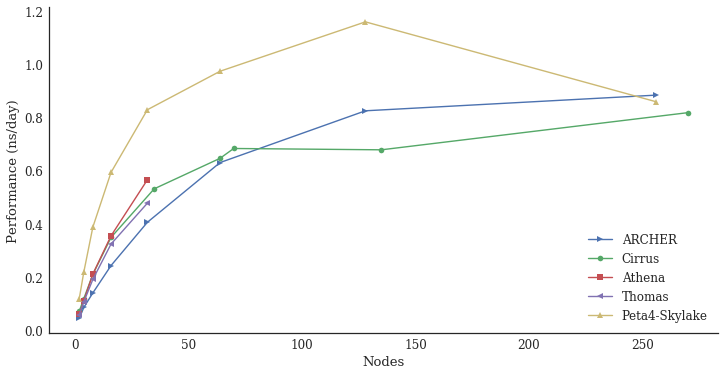

In [83]:
plt.plot(archernodes, archerperf, '>-', label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', label='Cirrus')
plt.plot(athenanodes, athenaperf, 's-', label='Athena')
plt.plot(thomasnodes, thomasperf, '<-', label='Thomas')
plt.plot(csd3snodes, csd3sperf, '^-', label='Peta4-Skylake')
# plt.plot(tessnodes, tessperf, '^-', label='Tesseract')
plt.xlabel('Nodes')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()
plt.savefig('gromacs_large_perf_full.png', dpi=300)

Zoom in on low core count region

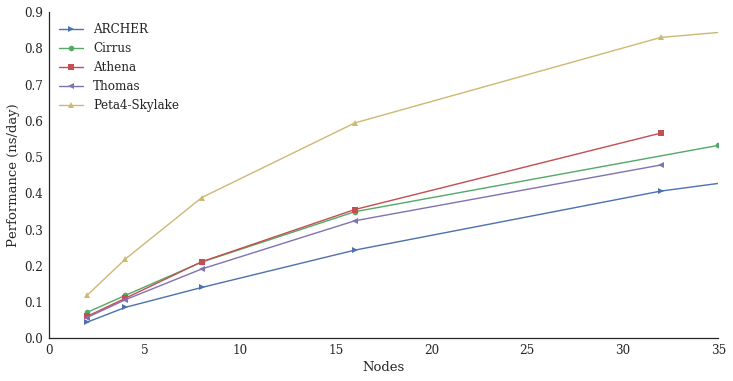

In [84]:
plt.xlim([0,35])
plt.ylim([0,0.9])
plt.plot(archernodes, archerperf, '>-', label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', label='Cirrus')
plt.plot(athenanodes, athenaperf, 's-', label='Athena')
plt.plot(thomasnodes, thomasperf, '<-', label='Thomas')
plt.plot(csd3snodes, csd3sperf, '^-', label='Peta4-Skylake')
#plt.plot(tessnodes, tessperf, '^-', label='Tesseract')
plt.xlabel('Nodes')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()
plt.savefig('gromacs_large_perf.png', dpi=300)

## Performance comparisons

### 2 Nodes

In [85]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archerperf[0]
cperf['ARCHER'] = archerperf[0]/(archercpn)
nperf['Cirrus'] = cirrusperf[0]
cperf['Cirrus'] = cirrusperf[0]/(cirruscpn)
nperf['Thomas'] = thomasperf[0]
cperf['Thomas'] = thomasperf[0]/(thomascpn)
nperf['Athena'] = athenaperf[0]
cperf['Athena'] = athenaperf[0]/(athenacpn)
nperf['Peta4-Skylake'] = csd3sperf[0]
cperf['Peta4-Skylake'] = csd3sperf[0]/(csd3scpn)
nperf['Tesseract'] = tessperf[0]
cperf['Tesseract'] = tessperf[0]/(tesscpn)

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("2 nodes")
for system in nperf:
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf[system]/nperf['ARCHER']))

print("per-core")
for system in cperf:
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf[system]/cperf['ARCHER']))

Performance improvement relative to ARCHER:

         System   Perf (ns/day)     Improvement
         ======   =============     ===========
2 nodes
         ARCHER           0.044           1.000
         Cirrus           0.071           1.614
         Thomas           0.057           1.295
         Athena           0.060           1.364
  Peta4-Skylake           0.118           2.682
      Tesseract           0.074           1.682
per-core
         ARCHER           0.002           1.000
         Cirrus           0.002           1.076
         Thomas           0.002           1.295
         Athena           0.002           1.169
  Peta4-Skylake           0.004           2.011
      Tesseract           0.003           1.682
